# Intro to Python Programming Using Pandas

Hello, and welcome to the Intro to Python Programming tutorial notebook! This notebook is adapted (and by adapted, we mean a good 95% of it is copy-pasted directly from the source) from an excellent tutorial called *Data Analysis Example: Analyzing Movie Ratings with Python* by Cagdas Yetkin. You can check out the original tutorial [here](https://codingnomads.co/blog/data-analysis-example-analyzing-movie-ratings-with-python/), and the corresponding GitHub code [here](https://github.com/CodingNomads/movie-analysis-python-pandas/blob/master/movie-analysis.ipynb).

The goal of this notebook is to get you quickly up to speed with some of the basics of Python programming (and programming in general!) and data manipulation. Instead of learning Python in a series of isolated and generic examples, we are going to try learning it with a contextualized example that will have immediate applications to scRNA-seq analysis.

How exactly does a tutorial based on movie ratings connect to scRNA-seq analysis? It all comes down to `pandas`, a popular Python library used for data analysis and manipulation. When you do scRNA-seq analysis using `scanpy`, you are using a `pandas` dataframe to store, manipulate, and analyze your data. So, if we can start learning how to use `pandas` now, some aspects of scRNA-seq analysis will make a lot more sense once we get to them!

***Feel free to start this notebook, save it, and come back to it as you have time! It covers a lot of ground, and does not need to be done at once. The Docker container you are using is mounted to your personal computer, which means you can start notebooks, save them, and the next time you open the container it will remember where you were!***

# Table of Contents
* [1 Get and Inspect the Data](#1-Get-and-Inspect-the-Data)
    - [Exercise_1.1](#Exercise_1.1)
    - [Exercise_1.2](#Exercise_1.2)
    - [Exercise_1.3](#Exercise_1.3)
* [2 Set Up Your Notebook](#2-Set-Up-Your-Notebook)
* [3 Read in the Data](#3-Read-in-the-Data)
    - [Exercise_3.1](#Exercise_3.1)
    - [Exercise_3.2](#Exercise_3.2)
* [4 Exploration](#4-Exploration)
    - [Exercise_4.1](#Exercise_4.1)
* [5 Join the Datasets](#5-Join-the-Datasets)
    - [Exercise_5.1](#Exercise_5.1)
    - [Exercise_5.2](#Exercise_5.2)
    - [Exercise_5.3](#Exercise_5.3)
    - [Exercise_5.4](#Exercise_5.4)
* [6 Visualize Patterns](#6-Visualize-Patterns)
    - [Exercise_6.1](#Exercise_6.1)
    - [Explore a Question](#Explore-a-Question)
        - [Exercise_6.2](#Exercise_6.2)
    - [Top Rated Crime Movies by Decades](#Top-Rated-Crime-Movies-by-Decades)
        - [Exercise_6.3](#Exercise_6.3)
        - [Exercise_6.4](#Exercise_6.4)
* [7-Summary](#7-Summary)

# 1 Get and Inspect the Data

First, before we analyze any data, we have to have data to analyze. We are going to be using data from the [Movie Tweetings Project](https://github.com/sidooms/MovieTweetings/tree/master/latest). This data consists of movie ratings from Twitter since 2013, updated daily. The data was created from people who connected their IMDB profile with their Twitter accounts. Whenever they rated a movie on the IMDB website, an automated process generated a standard, well-structured tweet. We can use this data to learn and practice data analysis using Python.

Let's make a new directory in our */workspace/intro_to_programming/* folder called *data*. There are two ways you can do this. You can open a terminal, navigate into */workspace/intro_to_programming/* using the `cd` command, and then make a data directory by using the `mkdir` command (i.e., `mkdir data`). Or, you can click on the new folder icon in the left sidebar and change to label to *data*.

Once we have created our *data* directory, we need to download our data files. There are three:
* *movies.dat* (`https://github.com/sidooms/MovieTweetings/raw/master/latest/movies.dat`)
* *ratings.dat* (`https://github.com/sidooms/MovieTweetings/raw/master/latest/ratings.dat`)
* *users.dat* (`https://github.com/sidooms/MovieTweetings/raw/master/latest/users.dat`)

Let's download these using our terminal. Open a terminal, and navigate into the *data* directory. Now, use the `wget` command to download each of the three links (i.e., copy the *movies.dat* link, and run `wget <LINK>` in the terminal. Repeat for the *ratings.dat* and *users.dat* links). After you have downloaded all three files, if you type `ls -l` in the terminal, you should see those three files now listed in your data directory.

Congratulations! We have data! Let's take a peek and see what it looks like.

In your *data* directory, using the terminal type:
```
head -n3 users.dat
```

This returns the first three lines of the `users.dat` file. You should see something that looks like this:
```
1::139564917
2::17528189
3::522540374
```

Without any other information, we would have no way of knowing what exactly we are looking at. Luckily, we can consult the Movie Tweetings Project [README](https://github.com/sidooms/MovieTweetings/blob/master/README.md) file, which tells us that "in *users.dat* the first field is the *user_id* and the second one is *twitter_id*". So we have two data fields, which are separated by `::`. Data fields can be divided by all sorts of different separators, and it's good to know which one is used in that data you are working with. Most often, you will probably see commas or tabs used as separators.

#### Exercise_1.1
Next, let's take a peek at the first 5 lines of the `movies.dat` file. You should see something like this:
```
0000008::Edison Kinetoscopic Record of a Sneeze (1894)::Documentary|Short
0000010::La sortie des usines Lumière (1895)::Documentary|Short
0000012::The Arrival of a Train (1896)::Documentary|Short
25::The Oxford and Cambridge University Boat Race (1895)::
0000091::Le manoir du diable (1896)::Short|Horror
```

#### Exercise_1.2
Knowing that our fields our separated by `::`, how many fields do we have in our `movies.dat` file? What are the fields? (Hint: check out the README!)

#### Exercise_1.3
Take a peek at the *last* 6 lines of the *ratings.dat* file. (Hint: instead of `head`, use `tail`!) You should see something like this:
```
71257::9784456::6::1595810413
71257::9893250::10::1613857551
71257::9898858::3::1585958452
71258::0172495::10::1587107015
71258::0414387::10::1587107852
71259::1623205::6::1362832655
```

How many fields are in *ratings.dat*? What are the fields?

Notice anything interesting about the 4th field in the *ratings.dat* file? This field contains timestamps for when the ratings were created, and are in UNIX time format. UNIX time is time format used in computer time that shows the seconds that have passed since January 1st, 1970, and is widely used in operating systems and file formats. But, it's not the most human-readable, so we'll be translating this field to standard datetime format later.

Alright, we have some data and we now have a feel for what the data looks like. Up to this point, we have not used any Python yet. We have been using the same commands that you would use to navigate the file system on your computer. But don't worry, Python is coming up next!

# 2 Set Up Your Notebook

In order to analyze our data, we need to set up our coding environment (this Jupyter notebook!). This involves loading (or importing) all of the python modules, packages, and libraries we need via the [`import`](https://docs.python.org/3/reference/import.html) statement. A python [`module`](https://docs.python.org/3/tutorial/modules.html) is a file that can define functions, classes and variables, and also include runnable code. A `script` is an executable module (also sometimes called a `program` or `application`. A python package is a collection of modules under a common namespace. You can kind of think of a package like a file system directory and modules as the files in the directory, though this is an oversimplification. A `library` is a generic term for a bunch of code that was designed with the aim of being usable by many applications. It provides some generic functionality that can be used by specific applications. 

Using `import...as...` allows us to rename modules/packages/libraries as they are imported for more concise method calls downstream (for instance, if we said `import pandas` and wanted to use the `.read_csv()` pandas method, we would have to call this as `pandas.read_csv()`. If we said `import pandas as pd` we could instead call `pd.read_csv()`).

In [1]:
# These imports are necessary
import warnings # this is so can ignore annoying (and usually unimportant) warning messages

import pandas as pd # our main data analysis and manipulation library
import numpy as np # library to handle large, multidimensional arrays and matrices
import scipy as sc # library for scientific computing and technical computing

import matplotlib.pyplot as plt # plotting library
import seaborn as sns # another plotting library; built on top of matplotlib

# These adjustments are not necessary, but will make your analysis easier and better-looking
plt.style.use('fivethirtyeight') # make our plots stylized like those on fivethiryeight.com
pd.set_option('display.max_rows', 50) # display 50 max rows to make our DataFrame more readable/visible
pd.set_option('display.max_columns', 50) # display 50 max columns to make our DataFrame more readable/visible
warnings.filterwarnings('ignore') # have cleaner notebook without warning messages

# 3 Read in the Data

Now that our coding environment is set up, we can read our files into pandas dataframes. In order to do this, we will use the `read_csv()` method in `pandas`. This method takes in a few parameters that we should pay attention to. We need to make sure that we define that the separators (or delimiters) are double colons `::`; give the column names, so that they will become headers in our dataframes; and convert the UNIX time in the *ratings.dat* file to a more readable datetime format. We also need to assign our dataframes - the objects that are generated using `.read_csv()` - to a variable. Let's read in our files one by one, starting with *users.dat*. We'll assign *users.dat* to a variable called `users`.

(***Did you know!*** How do you know what parameters a function might need? All Python libraries have an Application Programming Interface (API) (or at least the good ones do!), which is a set of definitions and protocols that tells you how to use the various functions included in a library. For example, [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) is `.read_csv()` page in the `pandas` API. You can see that it can take in way more parameters than we will provide. A *required* parameter is something like the *filepath_or_buffer* parameter. You have to pass `.read_csv()` some sort of file to read. An *optional* parameter is something like the *sep* parameter. You don't have to pass `.read_csv()` a delimiter, and if you don't it will default to a comma. In our case, we will pass `read_csv` a *sep* parameter.)

In [2]:
# What is this code doing?
# the .read_csv() is a pandas method that reads a .csv file to a dataframe
# we need to give the .read_csv() method the path to our .csv file, 'data/users.dat' in this case
# we also need to tell it how our data is separated in the .csv file (by ::)
# we also need to give it some names to use for the columns (you can get these from README linked above)
# we assign the resulting dataframe to a variable called users, which we can use downstream
users = pd.read_csv('data/users.dat', sep='::', names=['user_id', 'twitter_id'])

The creates a `DataFrame()` object called `users`. We can look at the first few entries of our new *users* `DataFrame()` using `.head()` method. (Note that this is different from the *head* command used in the terminal, which is a Linux command.)

In [3]:
users.head()

,user_id,twitter_id
0,1,139564917
1,2,17528189
2,3,522540374
3,4,475571186
4,5,215022153


Sweet, that looks pretty good! Let's do the same thing with our other two files.

We'll do the *ratings.dat* file next. Similar to before, you will want to read in the data and save it into a data frame, define the separator, and pass in the column names. Additionally, you will also call the `.sort_values()` method on the dataframe right away, to sort your data by when the ratings have been created.

In [4]:
ratings = pd.read_csv('data/ratings.dat', sep='::',
                      names=['user_id', 'movie_id', 'rating', 'rating_timestamp']
                      ).sort_values('rating_timestamp') # sorting the dataframe by datetime

You will also want to convert the rating_timestamp values to actual datetime format, and you can do that in `pandas` like so: in order to reference a specific column in a dataframe, we use the notation: `dataframe["column_name"]`. In this next code chunk, we are overwriting the original `ratings["rating_timestamp"]` column with a new `ratings["rating_timestamp"]` column that has `rating_timestamp` values in datetime format.

#### Exercise_3.1
Look up the `.to_datetime()` method in the [`pandas` API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) and figure out what parameters we are using in the code below:

In [5]:
ratings['rating_timestamp'] = pd.to_datetime(ratings['rating_timestamp'], unit='s')

Let’s peek into the first 5 rows of your newly created ratings dataframe:

In [6]:
ratings.head()

,user_id,movie_id,rating,rating_timestamp
146299,11570,2171847,6,2013-02-28 14:38:27
609296,47876,444778,8,2013-02-28 14:43:44
636479,49892,1411238,6,2013-02-28 14:47:18
674391,52623,1496422,7,2013-02-28 14:58:23
774473,60785,118799,5,2013-02-28 15:00:53


Two files down, one to go!

#### Exercise_3.2
Read in the *movies.dat* file. What do the first 5 lines look like? (Hint: use `.read_csv()` to read in the data and save it into a dataframe, define the separator, and pass in the column names!)

In [7]:
# YOUR CODE GOES HERE

,movie_id,movie_title,genres
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
1,10,La sortie des usines Lumière (1895),Documentary|Short
2,12,The Arrival of a Train (1896),Documentary|Short
3,25,The Oxford and Cambridge University Boat Race ...,NaN
4,91,Le manoir du diable (1896),Short|Horror


Fantastic! All of our data is now read into our notebook, and we have some dataframes to play with. Next we will explore our data.

# 4 Exploration

To get a feeling for the data you are working with, it always helps to play around a little and create some quick stats and graphs for different aspects of it. This will help you have a better overview of what the data is about.

Let's find out how well movies are liked or disliked. The most important variable for this is the movie rating. Let's check out what our movie rating distribution looks like by using `.value_counts()`. `.value_counts()` is a quick and effective way of checking what values our variable takes.

In [8]:
ratings['rating'].value_counts()

8     220727
7     205171
9     129426
6     119473
10    107829
5      69169
4      28004
3      15387
1      10752
2       9153
0        279
Name: rating, dtype: int64

Nice. Here we can quickly see that the rating score **8** was given **220727** times, and is the most common rating assigned to movies.

Let’s keep exploring. A histogram will show you the distribution of movie ratings, and the `.describe()` method will give additional basic statistics. Both of them are quite helpful to get quick insights, so let’s try them out next:

In [9]:
ratings['rating'].describe()

count    915370.000000
mean          7.314042
std           1.852865
min           0.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: rating, dtype: float64

<AxesSubplot:>

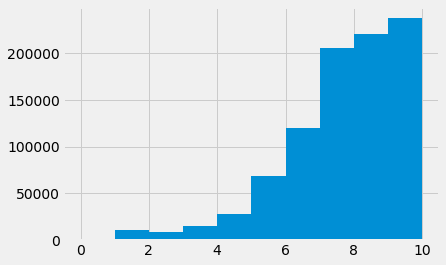

In [10]:
ratings['rating'].hist(bins=10)

Notice that our histogram is skewed to the left? That means that the distribution doesn’t have a symmetrical shape around the mean, and this specific off-balanced distribution has a long tail on the left hand side.

The `.hist()` and `.describe()` methods are in fact quite similar: one gives text output and the other gives its visual representation.

Given that both functions return the same output, you may also be able to conclude that the rating is left-skewed by looking only at the text output of your `.describe()` method. The relevant data for this conclusion are:

* The mean is much smaller than the median and
* 25% of the data covers only until a rating of 6

This is a bit confusing. You have seen first that the highest frequency was 8. And then, after generating the histogram, it looked like the ratings were highest around 9–10.

This difference can arise because of binning. Different amounts of bins will lead to different results. Most of the time, the person conducting the analysis decides the right number of bins after a few trials. Generally, you will have a better idea about what is the right bin size for your data set after some research and digging into it.

Playing with the bins of a histogram can have an impact on the story you are telling. The same histogram would look like this if you increase the number of bins from 10 to 30:

<AxesSubplot:>

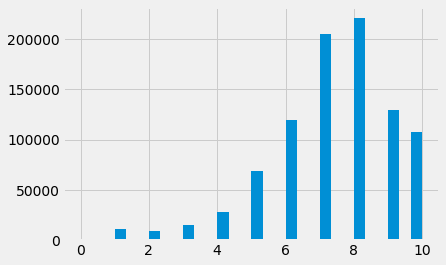

In [11]:
ratings['rating'].hist(bins=30)

You can see that this can lead to a different conclusion. If you were using the first histogram you would falsely argue that the most frequent rating was 9 or maybe 10. However, the second one makes everything crystal clear and shows that the most frequent rating lies at 8 instead. Also, note that if you use the `.value_counts()` method, you wouldn’t fall into that trap.

Thanks to these methods now you have a more clear understanding about the `rating` variable in your data. Let's focus on the `user_id` column next.

Let's see how many unique `user_id`s we have in the `users` data. We can do this using the `.unique()` method:

In [12]:
f"You have {len(users.user_id.unique())} unique user ids in the data."

'You have 71259 unique user ids in the data.'

That last code chunk was a little funky, wasn't it? Instead of just calling a `.method()` and spitting out the results, here we used what's called an `f-string` to print our data out in a pretty way. `f-strings` make string interpolation simpler in Python, and lets us embed Python expressions inside strings for formatting purposes. You can see the read text are just strings, and the stuff between the curly brackets, `{}` is our Python expression. `users.user_id.unique()` would return a list of all unique `user ids`. We wrap this in `len()`, which counts the length of `users.user_id.unique()`. Make sense?

One more thing. You might have noticed this time that we accessed the `user_id` column using **dot notation**. Calling `users.user_id.unique()` is the same thing as calling `users['user_id'].unique()`.

#### Exercise_4.1
Using the `.value_counts()` and `.describe()` methods, answer the following questions about our `user_id` column:
* How many rating tweets are posted by a user on average?
* What is the minimum, maximum, and median number of tweets posted by the users?
* How active are the users, i.e. are they frequent users or are they disappearing after one single tweet?

(Hint: combine `.value_counts()` and `.describe()` into the same line of code!)

In [13]:
# YOUR CODE HERE

# 5 Join the Datasets

`pandas` has a user-friendly interface to [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) our `movies` dataframe with the `ratings` dataframe. We'll be using an *inner* join, which means that we will only be bringing in the movies if there is a rating available for them (since unrated movies are not very informative).

In [14]:
movies_rating = (ratings
                  .set_index("movie_id")
                  .join(movies.set_index("movie_id"),
                        how="left")
                 )

movies_rating.head()

,user_id,rating,rating_timestamp,movie_title,genres
movie_id,,,,,
8,43197,5,2014-04-08 18:20:11,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
10,71052,10,2014-10-09 18:15:53,La sortie des usines Lumière (1895),Documentary|Short
12,70002,10,2015-08-10 23:16:19,The Arrival of a Train (1896),Documentary|Short
25,37892,8,2017-02-27 10:04:59,The Oxford and Cambridge University Boat Race ...,NaN
91,5855,6,2013-11-23 18:59:55,Le manoir du diable (1896),Short|Horror


Alright, so what exactly did the code above do? We set the `index` (the rows) for both our `ratings` and `movies` dataframes to `movie_id`. Because these two dataframes had the same `index`, the `.join()` method knew on which variable to join and by default this creates an inner join (i.e., you did not need to specify the `on` and `how` parameters when you joined the data).

So now we have a new dataframe, `movies_rating`, which is a combination of our `ratings` and `movies` dataframes.

Looking at the output of the `.join()` operation, you have a new problem: You want to quantify the genres, but how would you count them?

One way of doing that could be creating dummies for each possible genre, such as Sci-Fi or Drama, and having a single column for each. Creating dummies means creating 0s and 1s just like you can see in the example below:

In [15]:
dummies = movies_rating['genres'].str.get_dummies()
dummies.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


We can concatenate these dummies to the original `movies_rating` dataframe, creating a new dataframe called `tidy_movie_ratings`:

In [16]:
tidy_movie_ratings = (pd.concat([movies_rating, dummies], axis=1)
                       .drop(['rating_timestamp', 'genres'], axis=1)
                )

tidy_movie_ratings.head()

,user_id,rating,movie_title,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,43197,5,Edison Kinetoscopic Record of a Sneeze (1894),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10,71052,10,La sortie des usines Lumière (1895),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12,70002,10,The Arrival of a Train (1896),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
25,37892,8,The Oxford and Cambridge University Boat Race ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91,5855,6,Le manoir du diable (1896),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


Here, we essentially expanded out the original `genres` column into separate columns, and we got ride of the `rating_timestamp` and original `genres` columns.

This is a pretty tidy looking dataframe! But it would be nice if we could get those production years in a separate column (and out of the `movie_title` column. Then we could compare film productions over the years. So, how do we do this?

To accomplish this, you will practice working with the `.str` attribute, which is quite popular – and a lifesaver in many cases! You will:

* Make a new column by getting the 4 digits representing the year
* Remove the last 7 characters from the movie names
* Check out the result

#### Exercise_5.1
First, what does it look like if we just grab the first entry in the `movie_title` column?
(Hint: There are several ways to do this! Try doing a Google search and see what you come up with. Remember that Python starts indexing at *0*, not *1*, so the first item is the item in the *0th* position, the second item is the the iem in the *1st* position, etc.)

In [17]:
# YOUR CODE HERE

'Edison Kinetoscopic Record of a Sneeze (1894)'

#### Exercise_5.2
What type is the first entry in the `movie_title` column?
(Hint: Check out [`type()`](https://docs.python.org/3/library/functions.html?highlight=type#type).)

In [18]:
# YOUR CODE HERE

str

You should see that the first entry of the `movie_title` column is a string (`str`). A string is simply a sequence of characters, and a character is simply a symbol. Strings are the main text-based data types in Python. Other data types include numeric types (such as `int` and `float`), sequence types (like `list`), and boolean types. You can read all about the different built-in Python data types [here](https://docs.python.org/3/library/stdtypes.html). Because you can do different things with different data types, it's always a good idea to know what type you are working with.

Alright, so we are working with a string. Strings are cool. We can *slice* them (`:` notation) in order to access a specific range of characters in a string. Let's take our movie title example:

```
title = 'Edison Kinetoscopic Record of a Sneeze (1894)'
```

This is a string, stored in a variable called `title`. If we wanted to access the first character of our string, we would type:
```
title[0]
```

This would return `'E'`. If we wanted the last character of our string, we would type:
```
title[-1]
```

This would return `')'`. If we wanted the first six characters of our string, we could type:
```
title[:6]
```

This would return `'Edison'`. Here, we are using *slice* notation to get the first 6 characters of our string. Remember, the first 6 characters are the characters in position 0 to position 5 of our string. *Slices* work such that the first index (the left side of the `:`) is where the *slice* starts, which is inclusive. The second index (the right side of the `:`) is where the *slice* ends, which is exclusive, meaning that character is ***not*** included in the *slice*. Let's practice!

#### Exercise_5.3
If you have not done so already, go ahead and assign the first entry of the `movie_title` column to a variable called `title`, then do the following:
* Slice `title` to return the word 'Kinetoscopic'.
* Slice `title` to return the year '1894' from the *start* of the string.
* Slice `title` to return the year '1894' from the *end* of the string. (Hint: Use negative indices.)

In [19]:
# YOUR CODE HERE

Now that we have a handle on slicing strings, let's return to our `tidy_movie_ratings` dataframe.

#### Exercise_5.4
* Make a new column by getting the 4 digits representing the year
* Remove the last 7 characters from the movie names (i.e., the year, the paranthesis, and the space after the title)
* Check out the result

In [20]:
# YOUR CODE HERE

# Add a production_year column to tidy_movie_ratings
tidy_movie_ratings['production_year'] = 

# Remove the last 7 characters from each entry in the movie_title column
tidy_movie_ratings['movie_title'] = 

# Before checking out the results, let's reset the index on the dataframe first:
tidy_movie_ratings.reset_index(inplace=True)

# Check out the results


,movie_id,user_id,rating,movie_title,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,production_year
0,8,43197,5,Edison Kinetoscopic Record of a Sneeze,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1894
1,10,71052,10,La sortie des usines Lumière,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1895
2,12,70002,10,The Arrival of a Train,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1896
3,25,37892,8,The Oxford and Cambridge University Boat Race,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1895
4,91,5855,6,Le manoir du diable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1896


Congratulations! With this, you have completed the most difficult part of this data analysis example: Getting and cleaning the data. Let’s quickly recap what you did so far:

* You read the raw data into data frames
* You learned and reported basic statistics
* You joined data frames and created new fields

Next, you are going to visualize your data and discover some patterns. When delivering a report in a professional or academic setting, this is where things start to get very interesting!

# 6 Visualize Patterns

First, you will start with visualizing the total volume of films created over the years.

Next, you will count the total number of productions for each year and plot it. The record you see for the year of 2021 should be filtered out before proceeding:

#### Exercise_6.1
In this next code chunk we've provided all the code. Can you explain what it's doing?
(Hint: the best way to see what code is doing is to take it piece-by-piece and switch in different variables and see what happens. ***Breaking the code is ok!*** It's a great way to understand how code is working.)

In [21]:
condition = tidy_movie_ratings["production_year"].astype(int) < 2021

prodcount = (tidy_movie_ratings[condition][["production_year", "movie_id"]]
             .groupby("production_year")
             .count()
            )

prodcount.tail()

,movie_id
production_year,
2016,82436
2017,63438
2018,45444
2019,53401
2020,13642


Next, let's chart a 5 year moving average of the total productions:

<AxesSubplot:title={'center':'Count of Rated Movies - by production year'}, xlabel='production_year'>

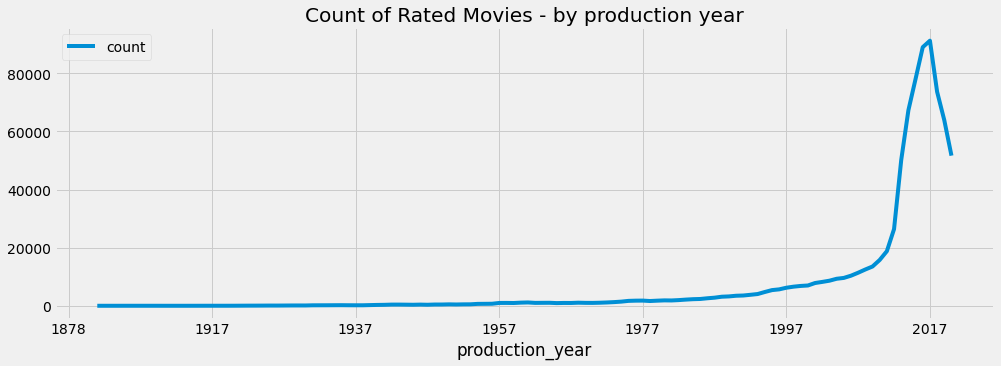

In [22]:
(prodcount
 .rolling(5).mean().rename(columns={"movie_id":"count"})
 .plot(figsize=(15,5),
       title="Count of Rated Movies - by production year")
)

You can see that the 5-year moving average is in a shocking decline! What is happening here? What can be the reason? Can you formulate some hypotheses? Here are some points for you to consider:

* This was an inner join. So these are the rated movies. Perhaps site and app usage went down.
* The filming industry is in a serious crisis! Movie production slowed because of COVID-19.
* People didn’t have time to watch the most recent movies. If they didn’t watch them, they don’t rate them, and you can see a decline in ratings. For example, you might not have watched the Avengers series before doing this analysis. On the other hand, the movie Braveheart (1995) most probably had enough time to get high numbers.

Each of these hypotheses could warrant an investigation, and there might be other ideas that you can come up with yourself. Feel free to explore any of these hypotheses further on your own. Remember that practicing your skills by following your interests is one of the best ways to learn new skills and keep them sharp.

For this data analysis example, let’s continue by investigating a slightly different question:

***What have people watched (or rated) most since 2000?***

### Explore a Question

For this question, let’s focus on the genres with a high volume of movies. You are going to identify the top 6 genres with the highest number of movies in them, and filter them out to produce the next chart:

In [23]:
top6_genre = (tidy_movie_ratings.iloc[:, 4:-1] # get the genre columns only
              .sum() # sum them up
              .sort_values(ascending=False) # sort descending
              .head(6) # get the first 6
              .index.values # get the genre names
              )

top6_genre

array(['Drama', 'Thriller', 'Action', 'Comedy', 'Adventure', 'Crime'],
      dtype=object)

#### Exercise_6.2
How would you get the top 10 genres with the highest number of movies in them? How about the bottom 3 genres with the lowest number of movies?

In [24]:
# YOUR CODE HERE

Now, you want to get the ratings for these genres from your tidy_movie_ratings data frame, but restrict the ratings to only the movies made between 2001 and 2020:

In [25]:
genre_groups = (tidy_movie_ratings.iloc[:, 4:]
                .groupby("production_year")
                .sum()
               ).loc["2001":"2020", top6_genre] # since 2001

Finally, you can create a graph showing a 2-year moving average of the total volume of rated films:

<AxesSubplot:title={'center':'Total Rated Films'}, xlabel='production_year'>

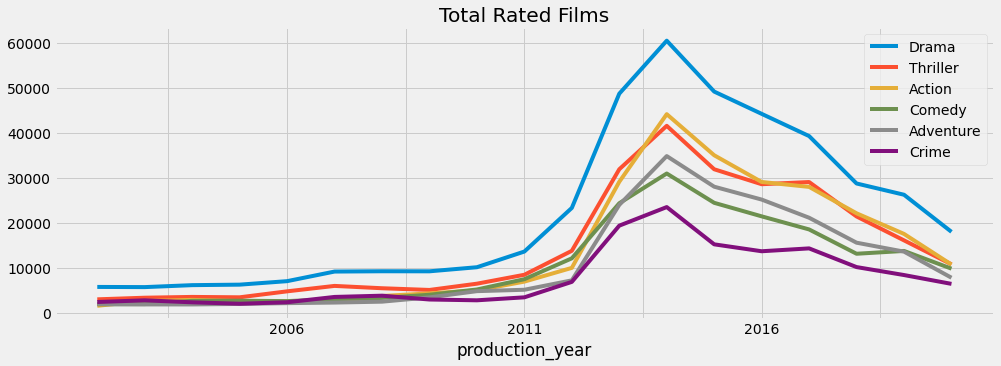

In [26]:
genre_groups.rolling(2).mean().plot(figsize=(15,5),
                                    title="Total Rated Films")

This gives a nice visual representation and helps you to interpret the data to answer the question you posed before. Here are the take-aways that I took from it:

* Drama and Thriller are the winner genres
* Seems that Crime & Adventure are not as popular

On the other hand, some patterns can be misleading since we are only looking at the absolute numbers. Therefore, another way to analyze this phenomenon would be to look at the percentage changes. This could help your decision making if you are, let’s say, in the business of online movie streaming.

So let’s give that a try and plot the percentage changes:

In [27]:
percent_change = (tidy_movie_ratings.iloc[:, 4:]
                    .groupby("production_year")
                    .sum()
                    .pct_change(periods=2) # 2 years percent change of the volume
                   ).loc["2001":"2020", top6_genre]

From this filtered data, let’s produce a 5-years moving average graph:

<AxesSubplot:title={'center':'Percentage Change in Rated Films'}, xlabel='production_year'>

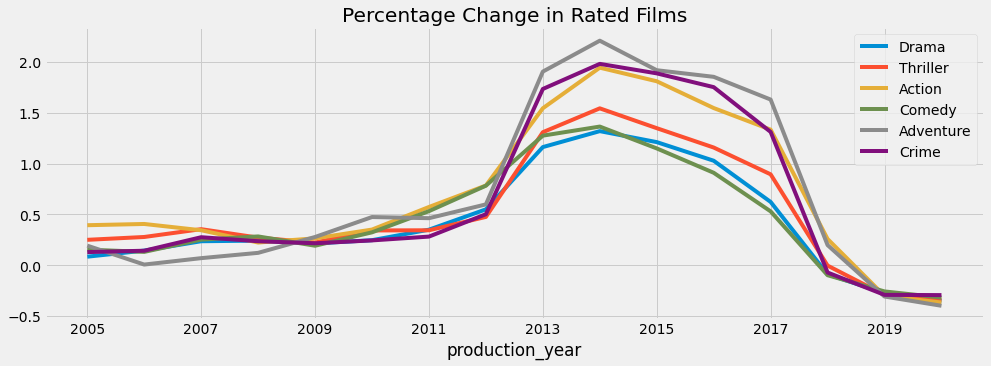

In [28]:
(percent_change.rolling(5).mean() # 5 years moving average
 .plot(figsize=(15,5),
       title="Percentage Change in Rated Films"))

You notice the decline you already spotted earlier. However, it’s interesting to see the Crime & Adventure genres moving to the top.

Indeed, Crime & Adventure movies were a real hype, and you might want to play your cards into them, especially if your business is somewhat related to global film industry trends. These two genres has the sharpest slope for the increase in receiving ratings. This may signal that there is an increasing demand and could be a valuable insight for your business.

Let’s stay with one of these hyped genres for a bit longer and explore yet another question you can answer through this data set.

### Top Rated Crime Movies by Decade

Let’s say you’re still building out your imaginary streaming service, you understood that the interest in Crime movies is rising sharply, and you want to make it easy for your users to find the best Crime movies of all times. What are the movies from each decade which you could suggest to your users by default?

To answer this question, let’s start by writing the necessary steps:

* Build a crime base table containing only the columns you need
* Filter for the records before 2021
* Create a new column called `decade`
* Check it out

And here’s the code to accomplish these tasks:

In [29]:
cols = ["movie_title", "rating", "production_year", "Crime", "movie_id"]
condition0 = tidy_movie_ratings["production_year"].astype(int) < 2021
condition1 = tidy_movie_ratings["Crime"] == 1

crime = (tidy_movie_ratings
         [cols]
         [condition0 & condition1]
         .drop("Crime", axis=1)
        )

crime["decade"] = crime['production_year'].astype(int)//10*10

crime.head()

,movie_title,rating,production_year,movie_id,decade
31,The Great Train Robbery,7,1903,439,1900
32,The Great Train Robbery,7,1903,439,1900
33,The Great Train Robbery,5,1903,439,1900
34,The Great Train Robbery,8,1903,439,1900
35,The Great Train Robbery,7,1903,439,1900


Next, you will filter for movies that have more than 10 ratings. But how can you find how many times a movie was rated? Here `.groupby()` comes to the rescue. After getting the counts, you will generate a new list called `movie_list` with the condition that a movie needs to have greater than 10 ratings. Below, the final operation will be only about getting the indices of the filtered `count_group`. You will achieve that by using `.index.values` method:

In [30]:
count_group = crime.groupby("movie_id").count()["rating"]

movie_list = count_group[count_group > 10].index.values
movie_list[:5]

array([22100, 23427, 24894, 25878, 36613])

`movie_list` now contains those movies that have been rated more than 10 times. Next, you will filter on your crime base table using the `movie_list`. Notice the usage of the `.isin()` method. It is quite user-friendly and straight-forward:

In [31]:
condition = crime["movie_id"].isin(movie_list)
columns = ["movie_title", "decade", "rating"]

crime_filtered = crime[condition][columns]

After you created the `crime_filtered` table, you can focus on building up your metrics in order to select the best liked movies of each decade. You will look at the average rating, and you will need to `.groupby()` decade and `movie_title`.

It is important to sort the aggregated value in a descending order to get the results you are expecting. You want each group to have a maximum of 5 films, so a lambda expression can help you to loop through the decade groups and show only the top 5. Otherwise, if there are less than 5 films in a decade, you want to show only the top movie, meaning only 1 record. Finally you will round the ratings to two decimal points.

You are encouraged to chop the code shown below into single lines and see the individual result for each of them:

#### Exercise_6.3
Chop up the code shown below into single lines and see the individual result for each of them.
(Hint: What does `crime_filtered.groupby(["decade", "movie_title"])` do? How about `crime_filtered.groupby(["decade", "movie_title"]).mean()`? etc.)

In [32]:
top_rate_by_decade = (crime_filtered
                     .groupby(["decade", "movie_title"])
                     .mean()
                     .sort_values(["decade", "rating"],
                                                ascending=False)
                     .groupby(level=0, as_index=False)
                     .apply(lambda x: x.head() if len(x) >= 5 else x.head(1))
                     .reset_index(level=0, drop=True)
                    ).round(2)

top_rate_by_decade

rating
decade movie_title                            
1930   The Thin Man                       8.53
1940   White Heat                         8.56
       Double Indemnity                   8.52
       Kind Hearts and Coronets           8.50
       Arsenic and Old Lace               8.40
       The Killers                        8.16
1950   12 Angry Men                       9.22
       Witness for the Prosecution        9.01
       Du rififi chez les hommes          8.64
       Dial M for Murder                  8.59
       Rashômon                           8.53
1960   Le trou                            9.00
       Tengoku to jigoku                  8.82
       In Cold Blood                      8.56
       To Kill a Mockingbird              8.52
       Sanjuro                            8.48
1970   The Godfather: Part II             9.14
       The Godfather                      9.05
       The Sting                          8.79
       A Clockwork Orange                 8.34
       Get Carter                         8.29
1980   Once Upon a Time in America        8.69
       Scarface                           8.56
       The Blues Brothers                 8.31
       Who Framed Roger Rabbit            8.18
       Midnight Run                       8.16
1990   Nema-ye Nazdik                     9.11
       The Green Mile                     9.02
       Se7en                              8.92
       Knockin' on Heaven's Door          8.86
       The Usual Suspects                 8.80
2000   The Dark Knight                    9.28
       Cowboy Bebop: Tengoku no tobira    9.13
       The Departed                       8.69
       Cidade de Deus                     8.59
       The Cove                           8.59
2010   Joker                              9.08
       Unconditional                      8.94
       O.J.: Made in America              8.88
       Drishyam                           8.77
       Wild Wild Country                  8.76
2020   Athlete A                          7.58
       Promising Young Woman              7.55
       Bad Boys for Life                  7.40
       The Devil All the Time             7.30
       Enola Holmes                       6.97

If you want to see the values starting from a specific decade, you can do so by slicing the dataframe. Let's look at just the top crime movies starting in 1990:

In [33]:
# loc method for filtering with the index
top_rate_by_decade.loc[1990:]

rating
decade movie_title                            
1990   Nema-ye Nazdik                     9.11
       The Green Mile                     9.02
       Se7en                              8.92
       Knockin' on Heaven's Door          8.86
       The Usual Suspects                 8.80
2000   The Dark Knight                    9.28
       Cowboy Bebop: Tengoku no tobira    9.13
       The Departed                       8.69
       Cidade de Deus                     8.59
       The Cove                           8.59
2010   Joker                              9.08
       Unconditional                      8.94
       O.J.: Made in America              8.88
       Drishyam                           8.77
       Wild Wild Country                  8.76
2020   Athlete A                          7.58
       Promising Young Woman              7.55
       Bad Boys for Life                  7.40
       The Devil All the Time             7.30
       Enola Holmes                       6.97

#### Exercise_6.4
Repeat the code in the above section (*Top Rated Crime Movies by Decades*) for your favorite genre of movie! (And if crime is your favorite genre of movie, then pick your second favorite genre for this exercise). Remember, you want to make it easy for users to find the best movies of your favorite genre for each decade. Follow these steps:

* Build a new base table containing only the columns you need for your favorite movie genre
* Filter for records before 2021
* Create a new column called `decade`
* Check it out! Did your favorite movie of your favorite genre make the cut?

# 7 Summary

**Congratulations!** You have officially completed your first movie recommendation engine! Ok, we know it’s not quite Netflix, which uses machine learning to recommend what you should watch. However in the tables you just generated, you’ve established some rule-of-thumb recommendations based on data and logic – a solid and fun first step!

What’s more, you’ve completed your own full data analysis example project:

* You read your data as `pandas` dataframes
* You created basic statistics and interpreted the results
* You joined dataframes, applied conditions to filter them, and aggregated them
* You used data visualization to find patterns and develop hypotheses
* And you didn’t jump into conclusions and root causes. You kept your reasoning simple and skeptic
* You created summary tables
* And you learned some basics of Python programming along the way!

All of the above are important and common aspects of working with data, and all of these aspects will carry over into bioinformatics analyses using `scanpy`.

If you enjoyed this data analysis example, again, we highly encourage you to check out the original tutorial by Cagdas Yetkin [here](https://codingnomads.co/blog/data-analysis-example-analyzing-movie-ratings-with-python/). At the end of his tutorial, Cagdas has some great recommendations on how you can take this data analysis example further if you are interested!